In [166]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
data = pd.read_csv('./Absenteeism_at_work.csv',sep=';', delimiter=None)

In [168]:
## classification solves the problem of identifying the category to which a
## new data point belongs. We build the classification model based on the training dataset
## containing data points and the corresponding labels

## Training Data

# https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

In [169]:
del data['ID']

In [170]:
data.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [171]:
data.isnull().sum().sort_values(ascending=False).head()

Absenteeism time in hours    0
Body mass index              0
Month of absence             0
Day of the week              0
Seasons                      0
dtype: int64

In [173]:
data['Age'].value_counts()

28    117
38    113
37     78
40     58
33     51
36     50
30     46
50     37
41     34
34     29
47     24
43     24
31     22
32     13
58      8
39      8
29      7
27      7
48      6
49      5
46      2
53      1
Name: Age, dtype: int64

In [153]:
data.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [154]:
# Disciplinary Failure 1
# Unjustified Absenses 26
# Education less than graduate < 2

In [155]:
x_age = data['Age']

In [156]:
y_bmi = data['Body mass index']

In [157]:
y_work_distance = data['Distance from Residence to Work']

In [163]:
data['Disciplinary failure'] == 1

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
710    True
711    True
712    True
713    True
714    True
715    True
716    True
717    True
718    True
719    True
720    True
721    True
722    True
723    True
724    True
725    True
726    True
727    True
728    True
729    True
730    True
731    True
732    True
733    True
734    True
735    True
736    True
737    True
738    True
739    True
Name: Disciplinary failure, Length: 740, dtype: bool

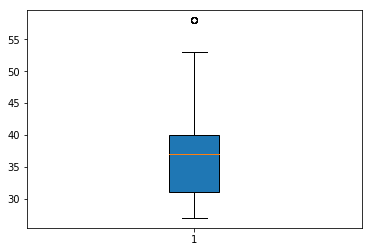

In [143]:
plt.boxplot(x_age,patch_artist=True, meanline=True)
plt.show()

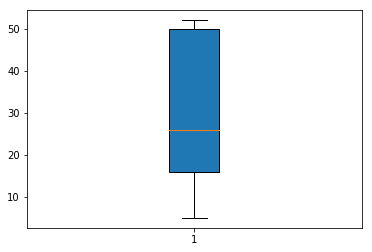

In [144]:
plt.boxplot(y_work_distance,patch_artist=True,meanline=True)
plt.show()

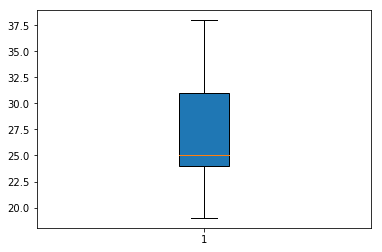

In [145]:
plt.boxplot(y_workload,patch_artist=True,meanline=True)
plt.show()

## Preprocessing Data

In [108]:
data_scaled = preprocessing.scale(data)
print("\nAFTER:")
print("Mean =", data_scaled.mean(axis=0))
print("Std deviation =", data_scaled.std(axis=0))


AFTER:
Mean = [ 2.16043399e-17 -1.63232791e-16 -1.34427004e-16  6.72135020e-17
  5.76115732e-17 -9.12183242e-17 -3.00060277e-17 -8.16163953e-17
 -4.27285834e-16 -4.22484870e-16 -2.49650150e-16  1.92038577e-17
  1.34427004e-16 -5.76115732e-17  7.68154309e-17 -5.04101265e-17
 -9.60192886e-18 -1.44028933e-17 -9.04981795e-16  1.12822664e-16
  3.00060277e-17]
Std deviation = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [109]:
# Normalize data use l2 to find outliners
data_normalized_l1 = preprocessing.normalize(data, norm='l1')
data_normalized_l2 = preprocessing.normalize(data, norm='l2')
print("\nL1 normalized data:\n", data_normalized_l1)
print("\nL2 normalized data:\n", data_normalized_l2)


L1 normalized data:
 [[0.0104112  0.0246083  0.00662531 ... 0.16279338 0.02839419 0.00378589]
 [0.04028856 0.         0.00783389 ... 0.19920452 0.03469292 0.        ]
 [0.00314283 0.02409502 0.00733327 ... 0.17809364 0.0324759  0.00209522]
 ...
 [0.004586   0.         0.         ... 0.19490518 0.03898104 0.        ]
 [0.00791907 0.         0.         ... 0.16828034 0.03464595 0.        ]
 [0.03566992 0.         0.         ... 0.17834958 0.02547851 0.        ]]

L2 normalized data:
 [[0.0250822  0.0592852  0.0159614  ... 0.39219442 0.068406   0.0091208 ]
 [0.10089136 0.         0.01961776 ... 0.49885173 0.08687867 0.        ]
 [0.00797249 0.06112243 0.01860248 ... 0.4517745  0.08238241 0.00531499]
 ...
 [0.0107588  0.         0.         ... 0.45724912 0.09144982 0.        ]
 [0.01890314 0.         0.         ... 0.40169178 0.08270125 0.        ]
 [0.08802205 0.         0.         ... 0.44011024 0.06287289 0.        ]]


In [112]:
variable_names = list(data)

In [146]:
factor = FactorAnalysis().fit(data)

pd.DataFrame(factor.components_ ,columns = variable_names)

KeyError: 'ID'

In [ ]:
def find_outliers_kde(x):
    x_scaled = scale(list(map(float, x)))
    kde = KDEUnivariate(x_scaled)
    kde.fit(bw="scott", fft=True)
    pred = kde.evaluate(x_scaled)
    
    n = sum(pred < 0.05)
    outlier_ind = np.asarray(pred).argsort()[:n]
    outlier_value = np.asarray(x)[outlier_ind]

    return outlier_ind, outlier_value